In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, IntSlider

D:\ANACONDA\envs\tensorflowgpu\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam

from keras.datasets import mnist
from keras.utils import to_categorical

In [24]:
(x_train0,y_train0),(x_test0,y_test0) = mnist.load_data()

In [25]:
print('總共: %d每一筆資料的尺寸%d x %d:'%x_train0.shape)

總共: 60000每一筆資料的尺寸28 x 28:


In [26]:
x_train = x_train0.reshape((x_train0.shape[0],28*28))
x_test =  x_test0.reshape((10000,28*28))

In [27]:
x_train -= x_train.min()
x_train = x_train/x_train.max()

In [28]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [29]:
x_test -= x_test.min()
x_test = x_test/x_test.max()

In [31]:
y_train_num = to_categorical(y_train0,10)
y_test_num = to_categorical(y_test0,10)

In [38]:
y_test_eo = np.ones_like(y_test0)
y_test_eo[y_test0%2==0] =0 

In [39]:
y_train_eo = np.ones_like(y_train0)
y_train_eo[y_train0%2==0] =0 

(array([29492.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 30508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

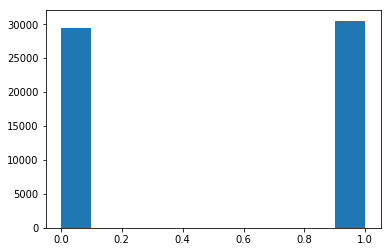

In [40]:
plt.hist(y_train_eo)

In [62]:
#784 -> fc_500 -> fc_500 ->fc_10

model = Sequential()
model.add(Dense(500,input_dim = 28*28))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [63]:
model.layers

In [64]:
first_layer =[Dense(500,input_dim = 28*28),Activation('sigmoid')] 
second_layer =[Dense(500),Activation('sigmoid')] 
last_layer =[Dense(10),Activation('softmax')] 

In [65]:
first_layer + second_layer+last_layer

In [66]:
model = Sequential(first_layer + second_layer+last_layer)

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_19 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_20 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [69]:
model = Sequential()
model.add(Dense(500,input_dim = 28*28))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_25 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_26 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [70]:
all_except_last_layer = [Dense(500,input_dim = 28*28),
                         Activation('sigmoid'),
                         Dense(500),
                         Activation('sigmoid')] 
last_layer =[Dense(10),Activation('softmax')] 

In [73]:
model_num = Sequential(all_except_last_layer+last_layer)
model_num.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_28 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_29 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_30 (Activation)   (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [89]:
# from keras.models import  model_from_json
# from keras.optimizers import SGD
# model_num = model_from_json(open('stupid_modle.json').read())
model_num.load_weights('stupid_modle_weight.h5')

In [96]:
model_num.compile(optimizer='sgd',loss = 'categorical_crossentropy',metrics = ['acc'])

In [97]:
score = model_num.evaluate(x_train,y_train_num,batch_size=10000)

60000/60000 [==============================] - 0s 6us/step


In [98]:
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

Loss: 1.893168
準確率: 31.955000


In [99]:
all_except_last = [Dense(500, input_dim=784), 
                   Activation('sigmoid'),
                   Dense(500), 
                   Activation('sigmoid')]

output_layer = [Dense(10), 
                Activation('softmax')]

model_num = Sequential(all_except_last + output_layer)
model_num.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_31 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_32 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_33 (Activation)   (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [100]:
new_output_layer = [Dense(2, activation='softmax')]

model_eo = Sequential(all_except_last + new_output_layer)
model_eo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_31 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_32 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 1002      
Total params: 644,002
Trainable params: 644,002
Non-trainable params: 0
_________________________________________________________________


In [107]:

# Keras utils
from keras.utils import np_utils

y_train01 = np.ones_like(y_train0)
y_train01[y_train0%2==0] = 0

y_test01 = np.ones_like(y_test0)
y_test01[y_test01%2==0] = 0

y_train01 = np_utils.to_categorical(y_train01, 2)
y_test01 = np_utils.to_categorical(y_test01, 2)


model_eo.compile(optimizer=SGD(lr=0.09), loss='categorical_crossentropy', metrics=['acc'])
score = model_eo.evaluate(x_train, y_train01, batch_size=10000)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

60000/60000 [==============================] - 1s 15us/step
Loss: 0.734184
準確率: 49.153333


In [108]:
for layer in all_except_last_layer:
    layer.trainable = False

In [110]:
model_eo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_31 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_32 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 1002      
Total params: 644,002
Trainable params: 644,002
Non-trainable params: 0
_________________________________________________________________


##  不用sequential

In [111]:
from keras.models import Model
from keras.layers import Input

In [ ]:
Dense(500, activation='sigmoid')